# Выдача за 15 минут

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format ='{:.2f}'.format
warnings.filterwarnings("ignore")

# Вспомогательные переменные

In [3]:
# сегодняшняя дата
today = datetime.date.today()
now_row = datetime.datetime.now()
now = now_row.strftime("%Y-%m-%d %H-%M-%S")
# сейвер
archive_path = f"C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\Архив\\{now} выдача за 15 минут.xlsx"
# период отчёта
start_date = pd.to_datetime('2023-11-07')
end_date = pd.to_datetime('2023-11-12')

# Исходники


In [4]:
first = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\time_live1.xlsx")
second = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\time_live2.xlsx")
third = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\time_live3.xlsx")
fourth = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\time_live4.xlsx")
fifth = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\выдача за 15 минут\\time_live5.xlsx")
VPR = pd.read_excel("C:\\Users\\rassadin_mi\\Desktop\\автоматизация отчёт ЦО\\отчёт по ЦО\\ВПР\\ВПР 15минут.xlsx")
LC_dict = dict(zip(VPR['Склад'], VPR['ЛЦ']))
RK_dict = dict(zip(VPR['Склад'], VPR['РК2']))
OP_dict = dict(zip(VPR['Склад'], VPR['ОП']))

## Обработка данных

In [5]:
# чищу файлы выгрузки от мусора и пустых строк
def cleance(dataset):
    # Удаление строк с 0 по 4 и 6-7
    dataset = dataset.drop(range(0, 5))
    dataset = dataset.drop(range(6, 8))
    # Изменение заголовка столбцов и сброс его
    dataset = dataset.rename(columns=dataset.iloc[0])
    dataset = dataset.drop(5)
    return dataset

In [6]:
# применяю очистку ко всем загруженным датасетам
first = cleance(first)
second = cleance(second)
third = cleance(third)
fourth = cleance(fourth)
fifth = cleance(fifth)

In [7]:
len(first)+ len(second)+ len(third)+ len(fourth)+ len(fifth)

95662

In [8]:
# собираю всё в один файл
data = pd.concat([first, second, third, fourth, fifth], ignore_index=True)

In [9]:
# тут я удаляю непонятную ерунду когда она появляется, позже автоматизирую
# 3 месяца спокойно- вохможно и не требуется а это был едиичный случай
# data = data[data['30ф'] != 2222222]

In [10]:
data['57ф'] = pd.to_datetime(data['57ф'], format='%H:%M:%S')
data['30ф'] = pd.to_datetime(data['30ф'], format='%H:%M:%S')
data['60ф'] = pd.to_datetime(data['60ф'], format='%H:%M:%S')
data['68ф'] = pd.to_datetime(data['68ф'], format='%H:%M:%S')
data["От101до57ф"] = data["От101до57ф"].fillna(np.nan).astype(float)
data["От101до30ф"] = data["От101до30ф"].fillna(np.nan).astype(float)
data["От101до60ф"] = data["От101до60ф"].fillna(np.nan).astype(float)
data["От101до68ф"] = data["От101до68ф"].fillna(np.nan).astype(float)

In [11]:
# столбцы нужно выбрать до 27, выгрузка бывает кривая и часто это мешает дальнейшему коду
data = data.iloc[:, :28]
data.head(2)

,Вид,Номер,Дата,Склад,Скл пол,С,Код к/аг,Назв к/аг,Класс к\аг,57у,30у,60у,Время,Время2,57ф,30ф,60ф,68ф,101-745,57у-57ф,30у-30ф,60у-60ф,От101до57ф,От101до30ф,От101до60ф,От101до68ф,КолТовСтр,ОбъемДок (м3)
0,60,962/26011168,2023-11-10 00:00:00,100,100,NaN,60164398,тов. чек ОП5 СПб,0d2,NaN,NaN,16:46:00,16:45:00,NaN,NaT,NaT,1900-01-01 16:52:00,NaT,NaN,NaN,NaN,6,NaN,NaN,7.00,NaN,3,0.00
1,810,101/102001004-2,2023-11-07 00:00:00,100,100,NaN,60055139,Ортега Групп,43,14:12:00,NaN,NaN,14:10:00,14:12:00,1900-01-01 14:14:00,NaT,NaT,NaT,2,2,NaN,NaN,4.00,NaN,NaN,NaN,1,0.00


In [12]:
#удалаяю вторую колонку "время" она мешает жить
column_names =['Вид','Номер','Дата','Склад','Скл пол','С','Код к/аг','Назв к/аг','Класс к\\аг','57у','30у',
 '60у','Время','Время2','57ф','30ф','60ф','68ф','101-745','57у-57ф','30у-30ф','60у-60ф','От101до57ф',
 'От101до30ф','От101до60ф','От101до68ф','КолТовСтр','ОбъемДок (м3)']
data.columns = column_names
data['Время'] = pd.to_datetime(data['Время'], format='%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Вид            95662 non-null  object        
 1   Номер          95662 non-null  object        
 2   Дата           95662 non-null  object        
 3   Склад          95662 non-null  object        
 4   Скл пол        95662 non-null  object        
 5   С              0 non-null      object        
 6   Код к/аг       95662 non-null  object        
 7   Назв к/аг      95642 non-null  object        
 8   Класс к\аг     94150 non-null  object        
 9   57у            69759 non-null  object        
 10  30у            7042 non-null   object        
 11  60у            19616 non-null  object        
 12  Время          95135 non-null  datetime64[ns]
 13  Время2         11568 non-null  object        
 14  57ф            65055 non-null  datetime64[ns]
 15  30ф            5653

In [13]:
data['Дата'] = data['Дата'].apply(pd.to_datetime)

In [14]:
# рамки отчёта
data = data.query(' `Дата` >= @start_date and `Дата` <= @end_date')
# склад получателя == 1000 это доставка, её необходимо убрать
data_no_1000 = data.query('`Скл пол` != 1000')

In [15]:
# Заполнение столбца на основе условий, тут нудно понять в каком из столбцов верный вариант показателя времени
# проверяю на заполненность по алгоритму приоритетности
def fill_service_time(row):
    cols = ['От101до68ф', 'От101до60ф', 'От101до30ф', 'От101до57ф']
    sum_cols = row[cols].sum()
    if sum_cols > 1440:
        return np.nan
    elif row['От101до57ф'] >= 0:
        return row['От101до57ф']    
    elif row['От101до30ф'] >= 0:
        return row['От101до30ф']    
    elif row['От101до60ф'] >= 0:
        return row['От101до60ф']    
    elif row['От101до68ф'] >= 0:
        return row['От101до68ф']
    else: 
        return np.nan

In [16]:
data_no_1000['Итого время обслуживания'] = data_no_1000.apply(fill_service_time, axis=1)

In [17]:
# задаю интервал времени обслуживания
zero_timedelta = pd.Timedelta(0, 'days') 
def interval(row):
    cols = ['57ф', '30ф', '60ф', '68ф']
    if pd.isnull(row['Итого время обслуживания']):
        return "нет данных"
    if row['Итого время обслуживания'] == 0:
        num_empty_cells = row[cols].isnull().sum()
        if num_empty_cells < 3:
            return "нет данных"
        if num_empty_cells == 3:
            if any(row[col] == row['Время'] for col in cols):
                return "до 15"
            else:
                return "нет данных"
    elif row['Итого время обслуживания'] < 15:
        return "до 15"
    elif row['Итого время обслуживания'] < 30:
        return "15-30"
    elif row['Итого время обслуживания'] < 45:
        return "30-45"
    elif row['Итого время обслуживания'] < 60:
        return "45-60"
    elif any(row[col] > row['Время'] for col in cols):
        return "выше часа"
    else:
        return "нет данных"       

In [18]:
data_no_1000['Интервал'] = data_no_1000.apply(interval, axis=1)

In [19]:
data_no_1000.head(3)

,Вид,Номер,Дата,Склад,Скл пол,С,Код к/аг,Назв к/аг,Класс к\аг,57у,30у,60у,Время,Время2,57ф,30ф,60ф,68ф,101-745,57у-57ф,30у-30ф,60у-60ф,От101до57ф,От101до30ф,От101до60ф,От101до68ф,КолТовСтр,ОбъемДок (м3),Итого время обслуживания,Интервал
0,60,962/26011168,2023-11-10,100,100,NaN,60164398,тов. чек ОП5 СПб,0d2,NaN,NaN,16:46:00,1900-01-01 16:45:00,NaN,NaT,NaT,1900-01-01 16:52:00,NaT,NaN,NaN,NaN,6,NaN,NaN,7.00,NaN,3,0.00,7.00,до 15
1,810,101/102001004-2,2023-11-07,100,100,NaN,60055139,Ортега Групп,43,14:12:00,NaN,NaN,1900-01-01 14:10:00,14:12:00,1900-01-01 14:14:00,NaT,NaT,NaT,2,2,NaN,NaN,4.00,NaN,NaN,NaN,1,0.00,4.00,до 15
2,810,101/10448713,2023-11-07,100,100,NaN,1619740,ООО Элтрон,40,12:46:00,NaN,NaN,1900-01-01 11:36:00,NaN,1900-01-01 11:44:00,NaT,NaT,NaT,NaN,7138,NaN,NaN,8.00,NaN,NaN,NaN,7,0.09,8.00,до 15


In [20]:
# из списков выгружаю принадлежность к Региону, Логичтическому центру и подгоняю название точки по коду
def get_LC(row):
    if row['Склад'] in LC_dict:
        return LC_dict[row['Склад']]
def get_RK(row):
    if row['Склад'] in RK_dict:
        return RK_dict[row['Склад']]
def get_OP(row):
    if row['Склад'] in OP_dict:
        return OP_dict[row['Склад']]    

In [21]:
data_no_1000['ЛЦ'] = data_no_1000.apply(get_LC, axis=1)
data_no_1000['РК'] = data_no_1000.apply(get_RK, axis=1)
data_no_1000['ОП'] = data_no_1000.apply(get_OP, axis=1)

In [22]:
# Для всех ОП при ЛЦ 68 документ это доставка, удалаяю 
data_no_1000.drop(data_no_1000[(~data_no_1000['68ф'].isnull()) & 
                                (~data_no_1000['ОП'].isin(['ОП при ЛЦ Воронеж', 
                                                          'ОП при ЛЦ Екатеринбург', 
                                                          'ОП при ЛЦ Котельники', 
                                                          'ОП при ЛЦ МЯ', 
                                                          'ОП при ЛЦ Новосибирск', 
                                                          'ОП при ЛЦ Ростов-на-Дону', 
                                                          'ОП при ЛЦ Самара', 
                                                          'ОП при ЛЦ СПб']))].index, inplace=True)

In [23]:
data_no_1000.groupby('Интервал')['Вид', '57ф', '30ф', '60ф', '68ф'].count()

,Вид,57ф,30ф,60ф,68ф
Интервал,,,,,
15-30,7553,6167,530,855,1
30-45,1745,1537,89,119,0
45-60,687,602,27,58,0
выше часа,2227,1912,143,170,2
до 15,76554,53859,4760,17932,6
нет данных,1233,970,104,114,3


In [24]:
data_no_1000['ОП'] = data_no_1000['ОП'].astype(str)
# удаляю данные 68Ф непустое + ОП при ЛЦ это доставки 
data_final = data_no_1000.query('not (`68ф`.notna() and ~`ОП`.str.contains("ОП при ЛЦ"))')

In [49]:
# Собираю итоговую таблицу, она понадобится если отчёт полностью перейдёт в jupyter
data_final_pivot = pd.pivot_table(data_final, index=["РК", "ОП"], columns=["Интервал"], aggfunc="size").reset_index()
column_names2 =["РК", "ОП",  "15-30", "30-45", "45-60", "выше часа", "до 15", "нет данных"]
data_final_pivot.columns = column_names2
data_final_pivot

,РК,ОП,15-30,30-45,45-60,выше часа,до 15,нет данных
0,ПК Нижняя Волга,ВТЦ Оренбург,5.00,NaN,NaN,1.00,305.00,2.00
1,ПК Нижняя Волга,ВТЦ Самара,13.00,9.00,12.00,10.00,422.00,2.00
2,ПК Нижняя Волга,ВТЦ Ульяновск,1.00,1.00,NaN,NaN,175.00,1.00
3,ПК Нижняя Волга,ВТЦ-1 Саратов,1.00,1.00,NaN,2.00,174.00,3.00
4,ПК Нижняя Волга,ВТЦ-1 Уфа,8.00,1.00,4.00,5.00,185.00,1.00
...,...,...,...,...,...,...,...,...
175,ЮК Ростов-на-Дону,ОП Ставрополь,2.00,NaN,NaN,2.00,381.00,NaN
176,ЮК Ростов-на-Дону,ОП Шахты,31.00,2.00,NaN,1.00,281.00,2.00
177,ЮК Ростов-на-Дону,ОП при ЛЦ Ростов-на-Дону,245.00,119.00,52.00,218.00,310.00,11.00
178,ЮК Ростов-на-Дону,ОП-1 Краснодар,52.00,34.00,11.00,114.00,520.00,13.00


In [50]:
# Та же таблица но с суммами
final_shaped = data_final_pivot.groupby("РК").sum()

# Создание нового датафрейма с суммами
sum_df = pd.DataFrame({"РК": ["Сумма"] * len(final_shaped)}, index=final_shaped.index)
sum_df["ОП"] = "Сумма"
sum_df["до 15"] = final_shaped["до 15"]
sum_df["15-30"] = final_shaped["15-30"]
sum_df["30-45"] = final_shaped["30-45"]
sum_df["45-60"] = final_shaped["45-60"]
sum_df["выше часа"] = final_shaped["выше часа"]
sum_df["нет данных"] = final_shaped["нет данных"]

# Присоединение нового датафрейма к исходной таблице
df_with_sum = pd.concat([data_final_pivot, sum_df])
display(df_with_sum)

,РК,ОП,15-30,30-45,45-60,выше часа,до 15,нет данных
0,ПК Нижняя Волга,ВТЦ Оренбург,5.00,NaN,NaN,1.00,305.00,2.00
1,ПК Нижняя Волга,ВТЦ Самара,13.00,9.00,12.00,10.00,422.00,2.00
2,ПК Нижняя Волга,ВТЦ Ульяновск,1.00,1.00,NaN,NaN,175.00,1.00
3,ПК Нижняя Волга,ВТЦ-1 Саратов,1.00,1.00,NaN,2.00,174.00,3.00
4,ПК Нижняя Волга,ВТЦ-1 Уфа,8.00,1.00,4.00,5.00,185.00,1.00
...,...,...,...,...,...,...,...,...
УК,Сумма,Сумма,1159.00,388.00,126.00,619.00,11707.00,289.00
ЦК Золотое кольцо,Сумма,Сумма,382.00,70.00,26.00,97.00,4972.00,75.00
ЦК Москва,Сумма,Сумма,695.00,130.00,71.00,99.00,6110.00,106.00
ЮК Воронеж,Сумма,Сумма,665.00,98.00,72.00,91.00,5992.00,35.00


In [52]:
normalized_sum_df = sum_df.copy()
normalized_sum_df = normalized_sum_df.drop(columns=normalized_sum_df.columns[[0,1]])
normalized_sum_df.iloc[:, :] = normalized_sum_df.iloc[:, :].div(
    normalized_sum_df.iloc[:, :].sum(axis=1), axis=0) * 100

normalized_sum_df = round(normalized_sum_df, 1)


# Отчёт 0 и 1 минута

In [27]:
# нужно задать новые критерии чтобы определить кто слишком быстро собирает заказы
# т.е. если строк больше 5 или кубатура больше 0.5м2 то 0 и 1 минута это невозможно в 95% случаев
def zero_one(row):
    if row['КолТовСтр'] >=5.0 or row['ОбъемДок (м3)'] > 0.5:
        return "5 и более строк или объем более 0,5"
    else: 
        return "прочее"

    
data_zero_one = data_final
data_zero_one["ОбъемДок (м3)"] = data_zero_one["ОбъемДок (м3)"].astype(float)
data_zero_one['5 и более строк ИЛИ объем более 0,5м3'] = data_zero_one.apply(zero_one, axis=1)


def zero_one_interval(row):
    if row["Итого время обслуживания"] == 0 or row["Итого время обслуживания"] == 1:
        return "0-1 минуту"
    elif row["Итого время обслуживания"] > 1 and row["Итого время обслуживания"] < 15:
        return "2-14 минут"
    else:
        return row["Интервал"]


data_zero_one['Интервалы 0 и 1'] = data_zero_one.apply(zero_one_interval, axis=1)

In [28]:
# райтер
writer = pd.ExcelWriter(archive_path)
# Запись
data_final.to_excel(writer, sheet_name=f'отчёт 15 минут', index=False)
data_zero_one.to_excel(writer, sheet_name=f'отчёт 0-1 минута', index=False)

# Сохранение
writer.save()

# Графики

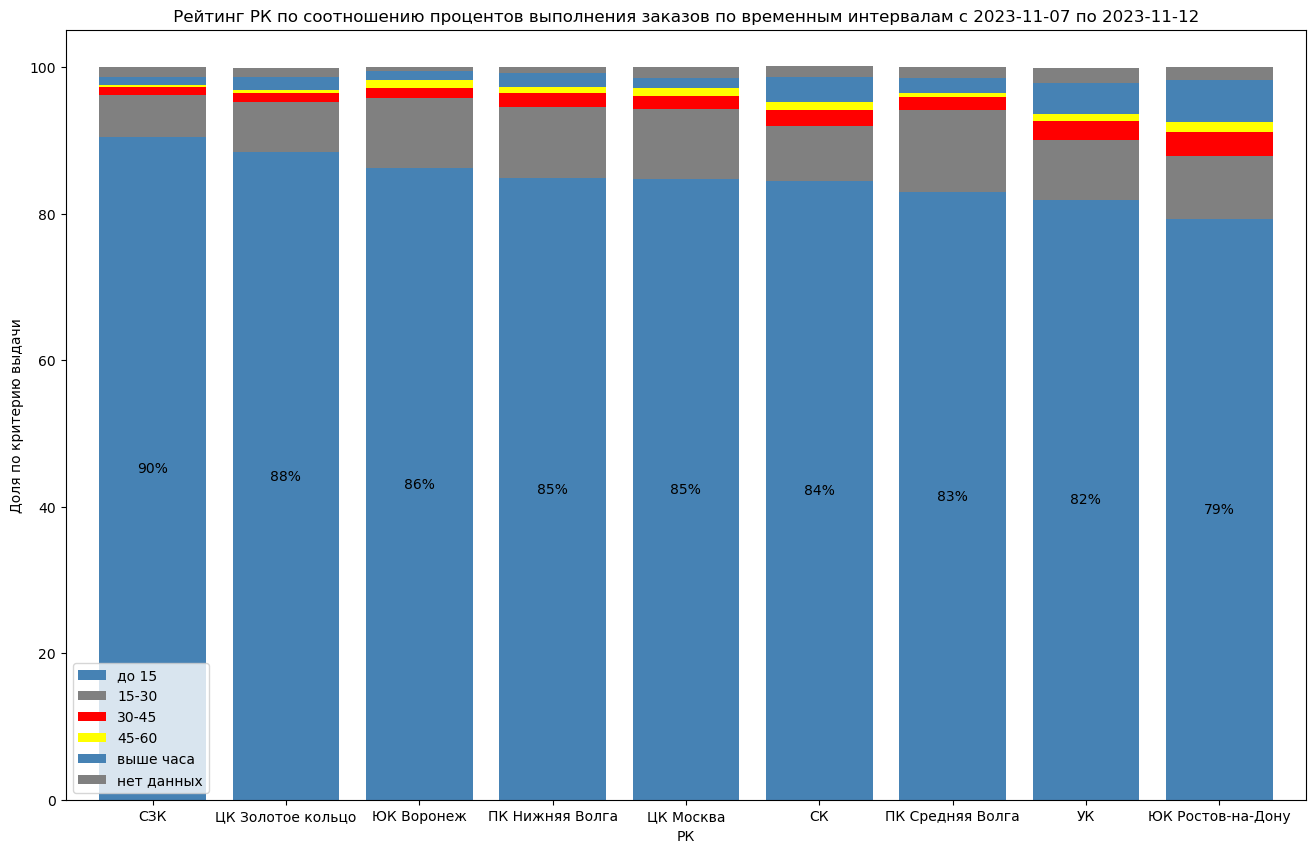

In [75]:
normalized_sum_df = normalized_sum_df.sort_values('до 15', ascending=False)
ax = normalized_sum_df.reset_index().set_index('РК').plot(kind='bar', stacked= True ,
                                      color=['steelblue', 'grey', 'red', 'yellow'], figsize=(16, 10), width=0.8);
ax.set_title(f" Рейтинг РК по соотношению процентов выполнения заказов по временным интервалам с {start_date.date()} по {end_date.date()} ")
ax.set_xlabel('РК')
ax.set_ylabel('Доля по критерию выдачи')
ax.legend(loc='lower left')
plt.xticks (rotation= 0 )
plt.xticks (rotation= 0 )
for i, label in enumerate(normalized_sum_df['до 15']):
    ax.annotate(f"{label:.0f}%", (i, label/2), ha='center', va='center');

In [111]:
data_zero_one_pivot =  pd.pivot_table(data_zero_one, index=["РК"],
                                      columns=["Интервалы 0 и 1"], aggfunc="size").reset_index()

data_zero_one_pivot = data_zero_one_pivot[['РК', '0-1 минуту', '2-14 минут']]
normalized_data_zero_one_pivot = data_zero_one_pivot.copy()

normalized_data_zero_one_pivot.iloc[:, 1:] = normalized_data_zero_one_pivot.iloc[:, 1:].div(
    normalized_data_zero_one_pivot.iloc[:, 1:].sum(axis=1), axis=0) * 100

normalized_sum_df = round(normalized_sum_df, 1)

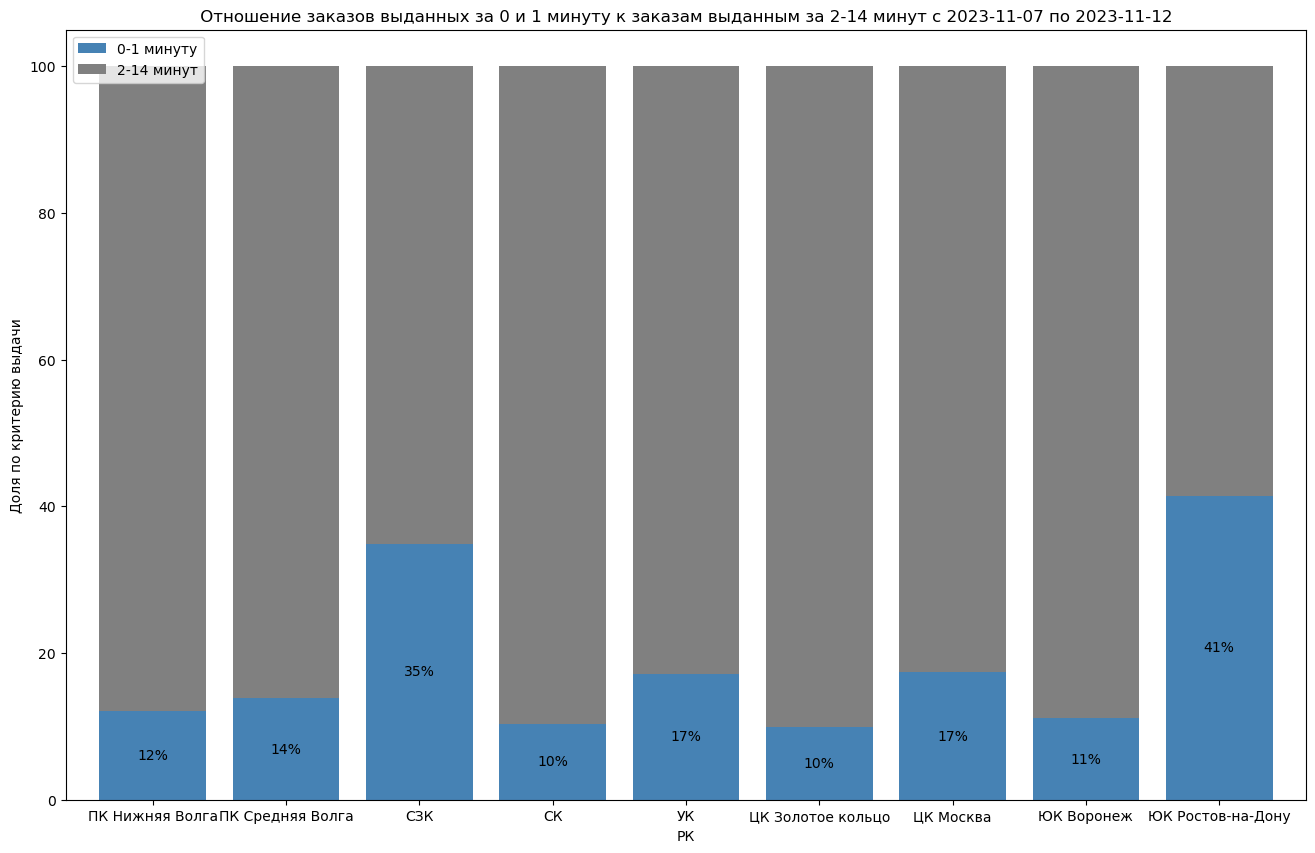

In [137]:
ax = normalized_data_zero_one_pivot.set_index('РК').plot(kind='bar', stacked= True ,
                                      color=['steelblue', 'grey', 'red', 'yellow'], figsize=(16, 10), width=0.8);
ax.set_title(f" Доля заказов выданных за 0 и 1 минуту к заказам выданным за 2-14 минут с {start_date.date()} по {end_date.date()} ")
ax.set_xlabel('РК')
ax.set_ylabel('Доля по критерию выдачи')
ax.legend(loc='upper left')
plt.xticks (rotation= 0 )

for i, label in enumerate(normalized_data_zero_one_pivot['0-1 минуту']):
    ax.annotate(f"{label:.0f}%", (i, label/2), ha='center', va='center');